In [21]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [22]:
df_Numeric = pd.read_excel(r"mergeHome_Numeric.xlsx")
df_Numeric.drop("Unnamed: 0", axis = 1, inplace = True)

# Bagımlı Degisken -> Fiyat
# Bagımsız Degisken ayrımı -> Fiyaat dşındaki özellikler

X = df_Numeric.drop(["Fiyat"], axis = 1)
y = df_Numeric["Fiyat"]

Train and Test Data

In [23]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

Farklı k değerlerine göre eğitim ve test hatası bulma

In [24]:
k=0
for k in range(30):
    k = k + 1
    k_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = k_model.predict(X_train)
    hata = np.sqrt(mean_squared_error(y_train, y_pred))
    
    print("k degeri = ", k , " hata degeri = ", hata)

k degeri =  1  hata degeri =  527.7678785034369
k degeri =  2  hata degeri =  4902.673750334624
k degeri =  3  hata degeri =  5854.223846966005
k degeri =  4  hata degeri =  6295.221282876527
k degeri =  5  hata degeri =  6555.069240484975
k degeri =  6  hata degeri =  6733.1969458340245
k degeri =  7  hata degeri =  6885.833631663554
k degeri =  8  hata degeri =  6998.787621226467
k degeri =  9  hata degeri =  7076.201275023878
k degeri =  10  hata degeri =  7137.749136279376
k degeri =  11  hata degeri =  7196.839403547619
k degeri =  12  hata degeri =  7244.084727570575
k degeri =  13  hata degeri =  7279.419168341353
k degeri =  14  hata degeri =  7335.861754782079
k degeri =  15  hata degeri =  7369.662899830775
k degeri =  16  hata degeri =  7405.206156062093
k degeri =  17  hata degeri =  7439.2245629064455
k degeri =  18  hata degeri =  7466.882691990094
k degeri =  19  hata degeri =  7486.516214454498
k degeri =  20  hata degeri =  7512.680362910211
k degeri =  21  hata degeri

Test Hatası

In [25]:
k=0
for k in range(30):
    k = k + 1
    k_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = k_model.predict(X_test)
    hata = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print("k degeri = ", k , " hata degeri = ", hata)

k degeri =  1  hata degeri =  9667.407789798688
k degeri =  2  hata degeri =  8488.169949256613
k degeri =  3  hata degeri =  8039.72978079642
k degeri =  4  hata degeri =  7876.559421117531
k degeri =  5  hata degeri =  7750.906695627263
k degeri =  6  hata degeri =  7719.401676952937
k degeri =  7  hata degeri =  7727.679193020393
k degeri =  8  hata degeri =  7697.366575224444
k degeri =  9  hata degeri =  7750.291572227706
k degeri =  10  hata degeri =  7723.385089604809
k degeri =  11  hata degeri =  7694.174640013552
k degeri =  12  hata degeri =  7713.2217176704735
k degeri =  13  hata degeri =  7696.285457912603
k degeri =  14  hata degeri =  7713.482018711165
k degeri =  15  hata degeri =  7704.439604310796
k degeri =  16  hata degeri =  7711.316603125406
k degeri =  17  hata degeri =  7698.461555684585
k degeri =  18  hata degeri =  7721.319083974143
k degeri =  19  hata degeri =  7724.585153961203
k degeri =  20  hata degeri =  7727.189829993897
k degeri =  21  hata degeri =

Best Parameters

In [26]:
knn_degerleri = {"n_neighbors": np.arange(1,30,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_degerleri, cv = 10)
knn_cv_model.fit(X_train, y_train)
knn_cv_model.best_params_

{'n_neighbors': 12}

ideal k, Model Traning

In [27]:
knn = KNeighborsRegressor(n_neighbors = 12)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=12)

Metrics

Training score:  0.4055968674593031
MSE: 59493789.27
RMSE: 7713.22
R2:  0.31470813392561003
MAE:  5822.969181459566
MAPE:  5822.969181459566


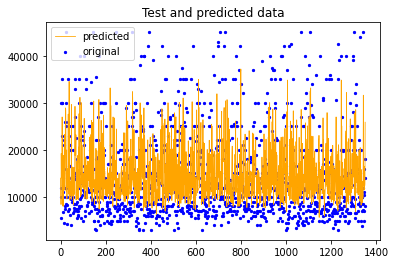

In [28]:
score = knn.score(X_train, y_train)  
print("Training score: ", score)

y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

r2 = r2_score(y_test, y_pred)
print("R2: ", r2)

mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)

mape = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE: ", mae)

x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="orange", label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()

One Home

In [29]:
new_data = [[2],[61],[50],[10],[15],[5],[0],[31]]


new_data = pd.DataFrame(new_data).T

df_new = new_data.rename(columns={
     0: "Oda_Sayisi",
     1: "Brut",
     2: "Net",
     3: "Bulundugu_Kat",
     4: "Bina_Yas",
     5: "Isitma_Tipi",
     6: "Esya_Durumu",
     7: "Ilce"})

pred = knn.predict(df_new)
pred

#7500

array([10600.])